<a href="https://colab.research.google.com/github/priyadharshini1907-code/driverDrowsiness/blob/main/final_visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required packages if not already available
!pip install pandas matplotlib seaborn folium plotly geopandas openpyxl

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px


/tmp/ipython-input-1-2859924827.py:13: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/content/crime data cleaned.csv', parse_dates=['date'], infer_datetime_format=True)


FileNotFoundError: [Errno 2] No such file or directory: '/content/crime data cleaned.csv'

In [3]:

# Load the file without date parsing
df = pd.read_csv('/content/crime data cleaned.csv')
print(df.columns)



Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'OCCURRED_ON_DATE',
       'TIME', 'DAY_OF_WEEK', 'UCR_PART', 'StreetREET', 'Lat', 'Long',
       'Location'],
      dtype='object')


In [6]:

# Correct date column name, no need for deprecated infer_datetime_format
df = pd.read_csv('/content/crime data cleaned.csv', parse_dates=['OCCURRED_ON_DATE'])
df = pd.read_csv('/content/crime data cleaned.csv')

# Convert the column manually to datetime
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'], errors='coerce')

# Extract useful time-based features
df['year'] = df['OCCURRED_ON_DATE'].dt.year
df['month'] = df['OCCURRED_ON_DATE'].dt.month
df['hour'] = df['OCCURRED_ON_DATE'].dt.hour


In [17]:


# ---- INTERACTIVE MAP: Crime Density Heatmap ----
# Filter for valid coordinates
map_df = df[['Lat', 'Long']].dropna()
map_center = [map_df['Lat'].mean(), map_df['Long'].mean()]
crime_map = folium.Map(location=map_center, zoom_start=11)
HeatMap(data=map_df[['Lat', 'Long']].values, radius=8).add_to(crime_map)
crime_map.save("crime_heatmap.html")
plt.show()

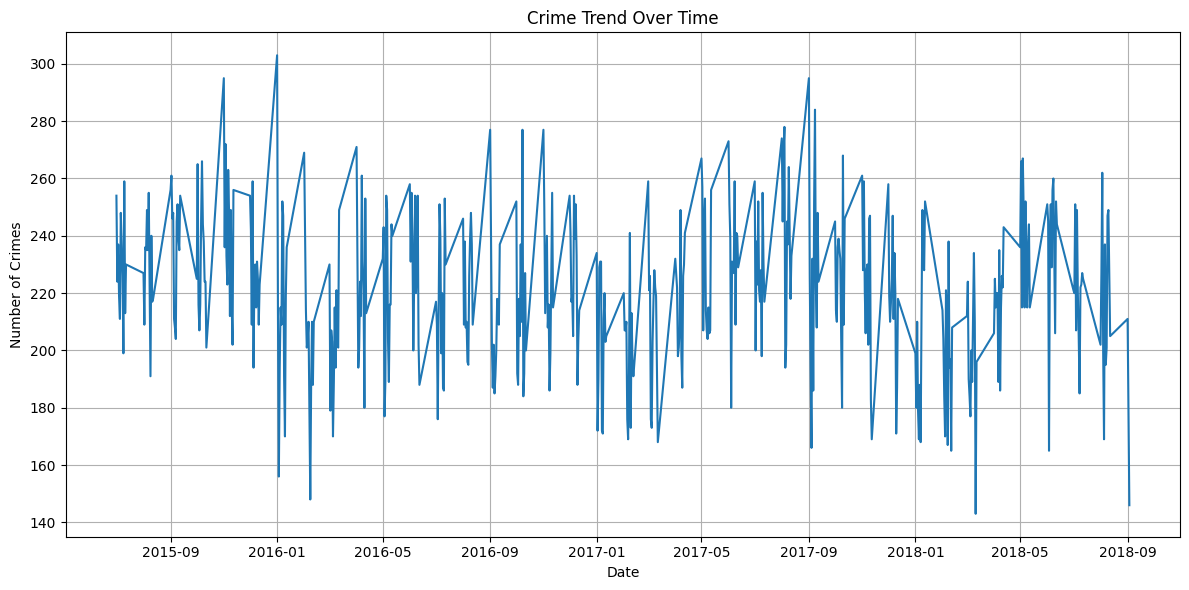

In [16]:
 #---- TIME SERIES: Crime Trends Over Time ----
plt.figure(figsize=(12,6))
df['date_only'] = df['OCCURRED_ON_DATE'].dt.date
daily_counts = df.groupby('date_only').size()
daily_counts.plot(title='Crime Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.tight_layout()
plt.savefig("time_series_trend.png")
plt.show()

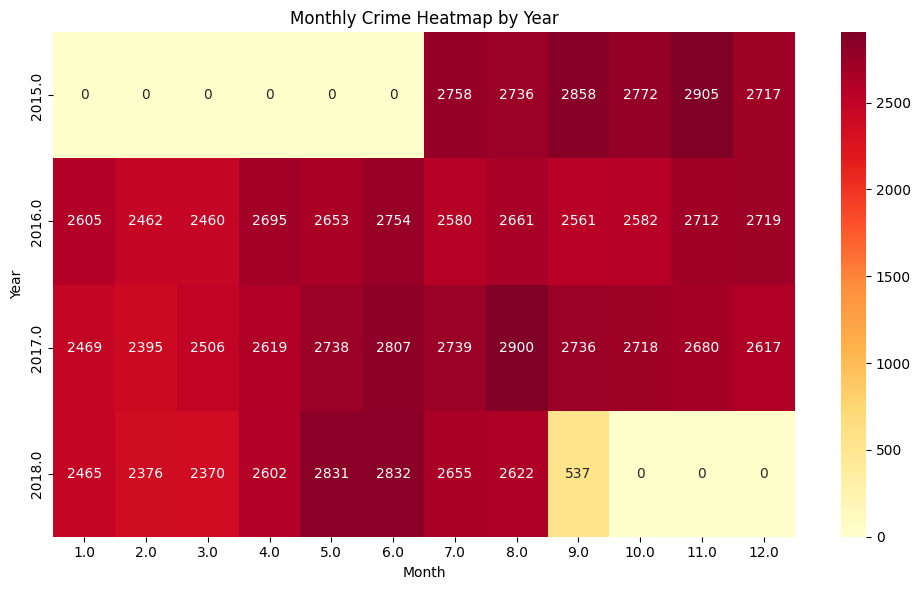

In [18]:
# ---- HEATMAP: Monthly Crime Count by Year ----
monthly = df.groupby(['year', 'month']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(monthly, cmap="YlOrRd", annot=True, fmt="d")
plt.title("Monthly Crime Heatmap by Year")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.savefig("monthly_heatmap.png")
plt.show()

In [20]:
#---- CATEGORY FILTER & DRILL-DOWN ----
top_categories = df['OFFENSE_CODE_GROUP'].value_counts().nlargest(10).index
filtered_df = df[df['OFFENSE_CODE_GROUP'].isin(top_categories)]

fig = px.histogram(filtered_df, x='OFFENSE_CODE_GROUP', color='year', barmode='group',
                   title='Top Crime Categories Over the Years')
fig.write_html("category_distribution.html")
fig.show()


In [22]:
#Export processed data
filtered_df.to_csv("filtered_crime_data.csv", index=False)
# Export sample report using to_excel (you can customize this further)
with pd.ExcelWriter("crime_report.xlsx") as writer:
    df.describe().to_excel(writer, sheet_name="Summary Stats")
    filtered_df.to_excel(writer, sheet_name="Filtered Crimes")
    print("✔️ All visualizations and reports generated.")

✔️ All visualizations and reports generated.
